In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

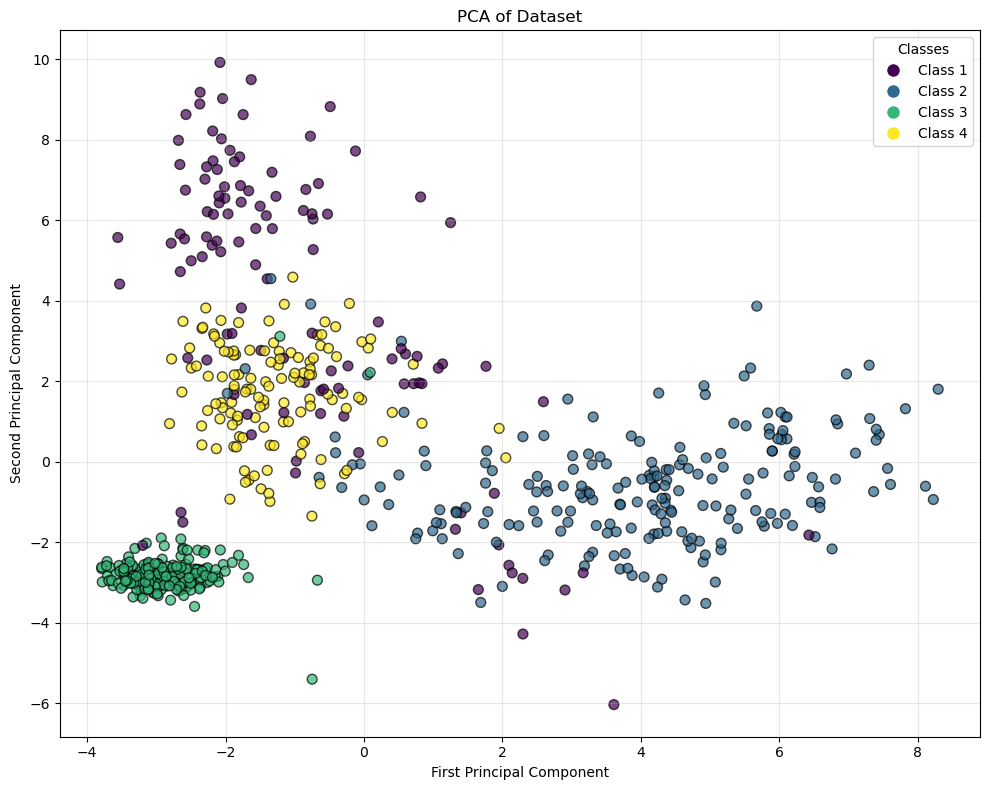

In [3]:
# get data
x = pd.read_csv('./HW2 Data/p2/x1.csv')
y = pd.read_csv('./HW2 Data/p2/c1.csv')

# apply PCA
pca = PCA()
x_pca = pca.fit_transform(x)

# Extract labels from y
labels = y['labels'].values

# Plot the 2D scatter plot with color-coded points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, alpha=0.7, 
                     cmap='viridis', edgecolor='k', s=50)

# Add colorbar and labels
unique_labels = np.unique(labels)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(label)), 
                      markersize=10, label=f'Class {label}') 
           for label in unique_labels]
plt.legend(handles=handles, title='Classes', loc='best')

plt.grid(True, alpha=0.3)
plt.tight_layout()

# the first principal component shows the direction with the highest variance
# the second principal component shows the direction with the second highest variance
# each subsequent component shows the direction with the next highest variance
# there is some class separability along the first principal component, we can see that class 3 is pretty well seperated from the rest,
# class 2 is somewhat seperated as well, class 1 and class 4 are not as well seperated. 
# is there any organization of classes into broader food categories?
# we could brodaly say that class 1, 2, and 4 are more similar to each other than they are to class 3 b/c class 3 is beef which is protein, while
# the other classes, vegetables, baked goods, and breakfast cereals are not rlly known for their protein quantity.


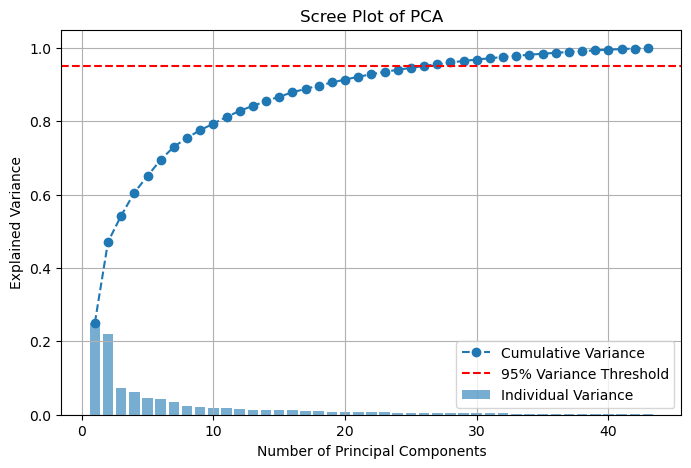

In [4]:
# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.6, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of PCA")
plt.legend()
plt.grid()
plt.show()

In [5]:
# finding the number of components that explain 95% of the variance
# we find the smallest number of PC that reaches the 95% threshold
num_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of principal components needed to capture 95% variance: {num_components}")

# there is low collinearity between the features, we need many PC to explain majority of the variance

Number of principal components needed to capture 95% variance: 26


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


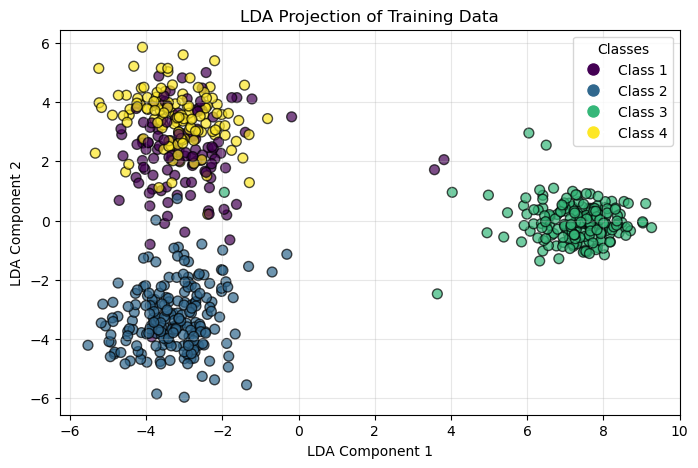

In [6]:
# fishers lda
x = pd.read_csv('./HW2 Data/p2/x1.csv')
y = pd.read_csv('./HW2 Data/p2/c1.csv')

# Fit LDA on the training data
lda = LinearDiscriminantAnalysis(n_components=3)
x_lda = lda.fit_transform(x, y)

labels = y['labels'].values

# Scatter plot for training data
plt.figure(figsize=(8, 5))
# For 2D LDA projection
scatter = plt.scatter(x_lda[:, 0], x_lda[:, 1], c=labels, alpha=0.7, 
					 cmap='viridis', edgecolor='k', s=50)

# Add labels and title
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Training Data")

# Add a legend
unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', 
					 markerfacecolor=scatter.cmap(scatter.norm(label)), 
					 markersize=10, label=f'Class {label}') 
		  for label in unique_labels]
plt.legend(handles=handles, title='Classes', loc='best')

plt.grid(alpha=0.3)
plt.show()

# Store LDA transformation matrix (w1)
w1 = lda.scalings_


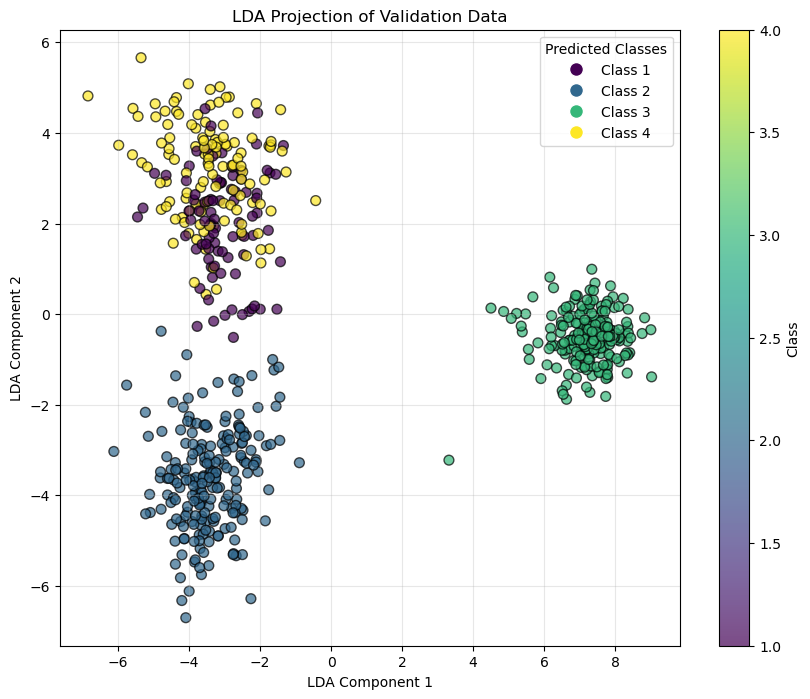

In [7]:
# Load validation data
x2 = pd.read_csv('./HW2 Data/p2/x2.csv')


# Project the validation data using the LDA transformation matrix w1
x2_lda = x2.dot(w1)

# Convert to DataFrame for easier manipulation
x2_lda = pd.DataFrame(x2_lda)

# Predict class labels for validation data
# First we need to use the existing LDA model to predict labels
predicted_labels = lda.predict(x2)

# Plot the results with color coding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x2_lda[0], x2_lda[1], c=predicted_labels, alpha=0.7, 
                     cmap='viridis', edgecolor='k', s=50)

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Validation Data")

# Add a legend
unique_labels = np.unique(predicted_labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(label)), 
                      markersize=10, label=f'Class {label}') 
          for label in unique_labels]
plt.legend(handles=handles, title='Predicted Classes', loc='best')

plt.grid(alpha=0.3)
plt.colorbar(scatter, label='Class')
plt.show()

# yes the lda for the training data does shows some strucutre. we can see seperation between classes 2 and 3 from class 1 and 4. classes 1 and 4, however, are seperated. 
# since classes 1 and 4 overlap we can see that LDA is not completely effective and adding in another classification method or dimension would be needed

# the same structure can be seen when we project the validation data onto the lda components. 
# because we have a similar strucutre LDA for this dataset generalizes quite well.

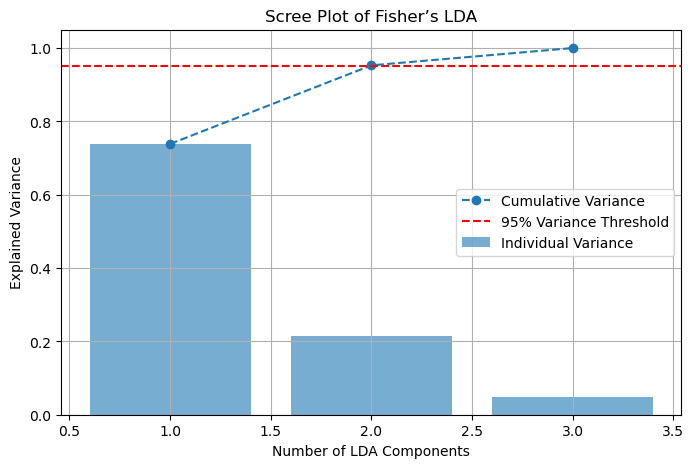

In [8]:
# Get eigenvalues (explained variance)
explained_variance = lda.explained_variance_ratio_

# Generate scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of LDA Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot of Fisher’s LDA")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Find number of LDA components needed for 95% variance
num_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Number of LDA components needed to capture 95% variance: {num_components}")

# the first component explains around 75% of the variance which shows that the dataset has high collinearity between the features.

Number of LDA components needed to capture 95% variance: 2
